In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
plt.style.use('fivethirtyeight')
import pandas as pd

# <font face='gotham' color = 'Purple'> Descriptive Statistics

Before making any inferences from a dataset, it is crucial that we understand the features of datasets by 'describing' them. We can either describe them by graphing or calculating numerical summarisations.

We will refresh most common descriptive statistics in this chapter, if you are working with data on a daily basis, no concepts here should sound strange to you.

Furthermore, we will not engage in complex programming techniques, such as OOP and sophisticated data structures. All the programmes should be self-explanatory to most of audiences.

## <font face='gotham' color = 'Purple'>Frequency Distribution/Histogram

Strictly speaking, frequency distribution and histogram are different descriptive tools, though they are delivering the largely identical information. Frequency distribution are usually presented in a table, for instance, rolling a dice $1000$ times might give a us frequency distribution table as following:


<table style="text-align:center; width:30%; text-align:center;font-size: 150% ">
  <caption style = "font-size: 110%">Rolling A Dice 1000 Times</caption>
  <tr>
    <th>Sides</th>
    <th>Frequency</th>
  </tr>
  <tr>
    <td>1</td>
    <td>172</td>
  </tr>
  <tr>
    <td>2</td>
    <td>158</td>
  </tr>
  <tr>
    <td>3</td>
    <td>170</td>
  </tr>
  <tr>
    <td>4</td>
    <td>158</td>
  </tr>
  <tr>
    <td>5</td>
    <td>187</td>
  </tr>
  <tr>
    <td>6</td>
    <td>155</td>
  </tr>
</table>

Or we can draw a frequency histogram, which simply converts the information of table into a graph.

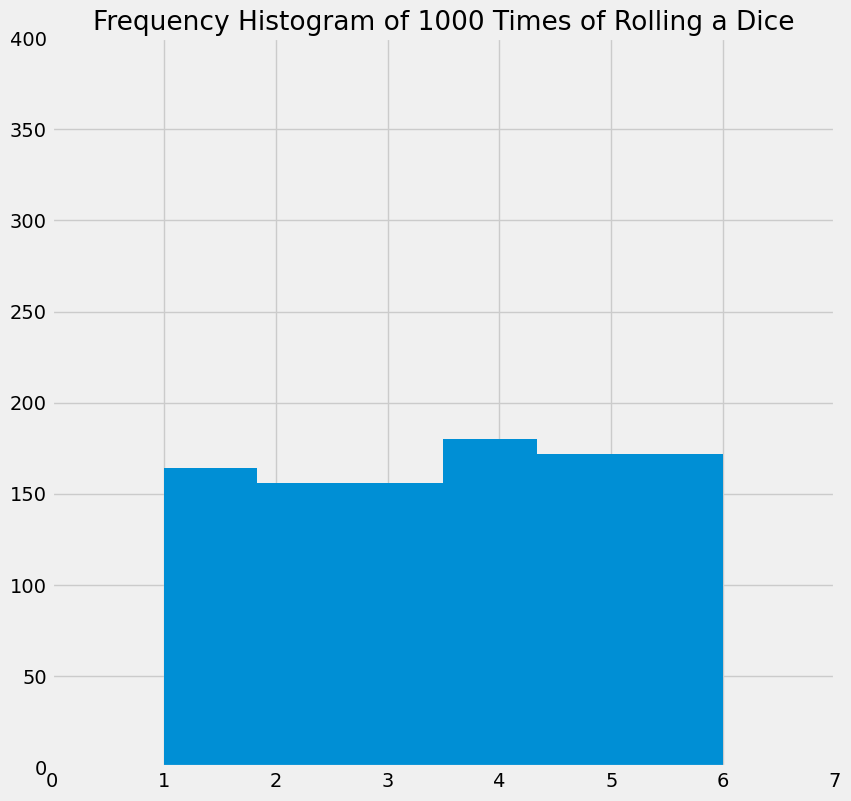

In [4]:
rollings = np.random.randint(1, 7, 1000)

fig, ax = plt.subplots(figsize=(9, 9))
n, bins, patches = ax.hist(rollings, bins = 6)
ax.set_title('Frequency Histogram of 1000 Times of Rolling a Dice', size = 19)
ax.set_xlim(0, 7)
ax.set_ylim(0, 400)
plt.show()

Next we try generating an array from a standard normal distribution $x\sim N(0, 1)$, then plot the histogram. And note that we add one parameter ```density=True``` in the ```hist``` method, it turns into a **relative frequency histogram**, because the $y$-axis represents relative frequencies.

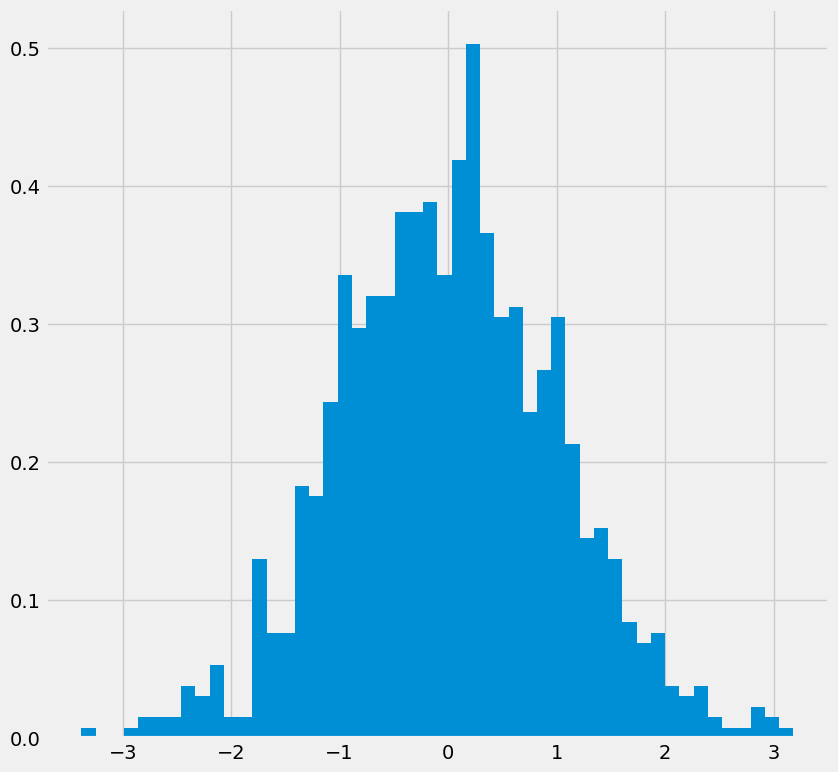

In [5]:
x = np.random.randn(1000)
fig, ax = plt.subplots(figsize=(9, 9))
n, bins, patches = ax.hist(x, bins = 50, density=True)

Careful audiences might have noticed that while we are plotting the histogram, we also have 3 variables returned ```n```, ```bins``` and ```patches```. ```n``` is (relative) frequency counts, ```bins``` is the location of each bin, ```patches``` is the list of patches objects in the plot.

The first charts below shows the same information as histogram, but with line plots rather than bars. But the second one is called *Empirical cumulative distribution**, it is empirical because it is not theoretically plotted, i.e. using a **cumulative distribution function (CDF)**.  

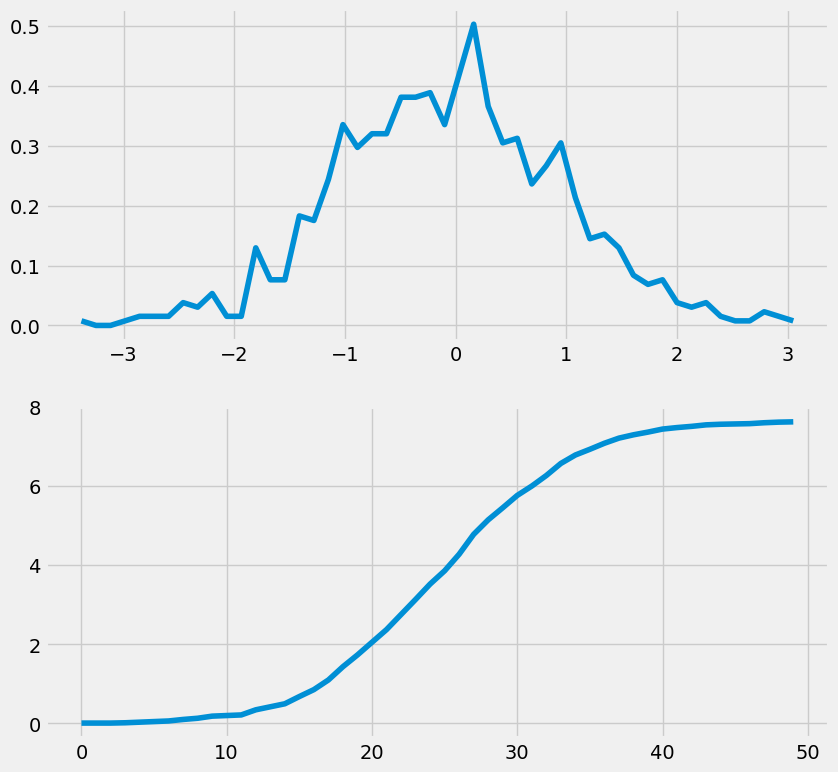

In [6]:
fig, ax = plt.subplots(nrows = 2, ncols = 1,figsize=(9, 9))
ax[0].plot(bins[:50], n)
ax[1].plot(np.cumsum(n))
plt.show()

# <font face='gotham' color = 'Purple'> Basic Numeric Descriptives

## <font face='gotham' color = 'Purple'> Measure Of Location

The most important **mean** we need is **arithmetic mean**, which is prevalent in all kinds of statistical techniques.
$$
\mu = \frac{1}{N}\sum_{i=1}^Nx_i\\
\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i
$$
The former one is _population mean_, the latter is _sample mean_. The formulae appear the same, but with different indication. $N$ is the population size, imagine the number of all human beings on earth, on the other hand, $n$ is sample size, for instance a sample of $1000$ persons from UK.

And one tricky mean commonly used in finance is **geometric mean**, not so intuitive at first sight.
$$
g = \bigg(\prod_{i=1}^nx_i\bigg)^{1/n}
$$
If you can't make sense out of it, accept a fact that geometric mean is commonly used when calculating _compound growth rates_, such as portfolio return. For instance, a portfolio manager has annual return recorded as below

<table style="text-align:center; width:40%; text-align:center;font-size: 150% ">
  <caption style = "font-size: 110%">Portfolio Return</caption>
  <tr>
    <th>Year</th>
    <th>Return</th>
  </tr>
  <tr>
    <td>2015</td>
    <td>36%</td>
  </tr>
  <tr>
    <td>2016</td>
    <td>23%</td>
  </tr>
  <tr>
    <td>2017</td>
    <td>-48%</td>
  </tr>
  <tr>
    <td>2018</td>
    <td>-30%</td>
  </tr>
  <tr>
    <td>2019</td>
    <td>15%</td>
  </tr>
  <tr>
    <td>2020</td>
    <td>31%</td>
  </tr>
  <tr>
    <td>Arithmetic Mean</td>
    <td>4.5%</td>
  </tr>
  <tr>
    <td>Geometric Mean</td>
    <td>-1.4%</td>
  </tr>
</table>

The arithmetic mean of return is $4.45\%$.

In [7]:
portfolio_return = np.array([0.36, 0.23, -0.48, -0.3, 0.15, 0.31])
np.mean(portfolio_return)

0.045000000000000005

However the geometric mean of return is $-1.42\%$. Geometric mean ```sp.stats.mstats.gmean``` is more accurate measurement when considering the compound effect, i.e. the data are related to each other by a growth rate.

In [8]:
sp.stats.mstats.gmean(portfolio_return + 1) - 1

-0.014282599080668423

## <font face='gotham' color = 'Purple'> Measures Of Variability

The first measurement of variability is the **range** measuring distance from lowest to highest. We'll generate an array of standard normal distribution for demonstration.

In [9]:
x = np.random.randn(50)

In [10]:
rangeLS = x.max() - x.min()
rangeLS

5.267674064464817

**Percentile** is also a common statistic concept, which could be best explained by an example. For instance, the GRE test result shows percentile besides your absolute score, say you have a percentile of $96\%$, it means your score is higher than $96\%$ of candidates. The special percentile of $75\%$ and $25\%$ are sometimes called the _third quartile_ and _first quartile_.

In [11]:
q75, q25 = np.percentile(x, [75 ,25]) # IQR
q75 - q25

1.2524781660419078

Before moving any further, we must clarify two statistical concepts: **population** and **sample**. For example, we want to know the variance of all human adults height, therefore we ought to measure all adults (population) on earth in order to calculate the variance, however the mission is impossible, instead we measure a smaller group of adults (sample) to make inferential statements about population.

Population and sample variance</font> differ in degree of freedom, where $N$ is the population size, whereas $n$ is the sample size, $\mu$ is the population mean and $\bar{x}$ is the sample mean. The formulae of variances are

$$
\sigma^2 = \frac{\sum(x_i - \mu)^2}{N}\\
s^2 = \frac{\sum(x_i - \bar{x})^2}{n-1}
$$

The latter is an unbiased estimator of population variance, which is also the _sample variance_.

To illustrate the idea, let's pretend there are only $N = 1000$ people on earth, we can generate an array to represent the population height, only for demonstrative purpose. We generate a population by setting ```loc=170``` and ```scale=10``` with ```np.random.normal```, i.e. $X\sim N(170, 10)$, then calculate the population variance by using ```np.var()```.

In [12]:
population_height = np.random.normal(170, 10, 1000)
np.var(population_height)

96.67248634711461

Now suppose we know nothing about the population, but we can get a sample of 100 persons. By setting ```ddof=1``` in function, we actually mean the degree of freedom is $N-1$, used on sample estimators.

In [13]:
sample_height = np.random.choice(population_height, size = 100)
np.var(sample_height, ddof = 1)

97.04324833832891

Theoretically, we can have tremendous amount of samples, say $10000$ samples. Yes, I mean $10000$ samples, not the sample size, but this is just a thought experiment, will never be achieved in real world. Again, pure demonstrative purpose.

What we are doing next: generate $10000$ samples, calculate the sample variances, plot histogram. The vertical line is the mean of sampling distribution of variance estimates. We set standard deviation of $\sigma = 10$, the theoretical variance $\sigma^2=100$, therefore we see the point estimator is doing a fair well job.

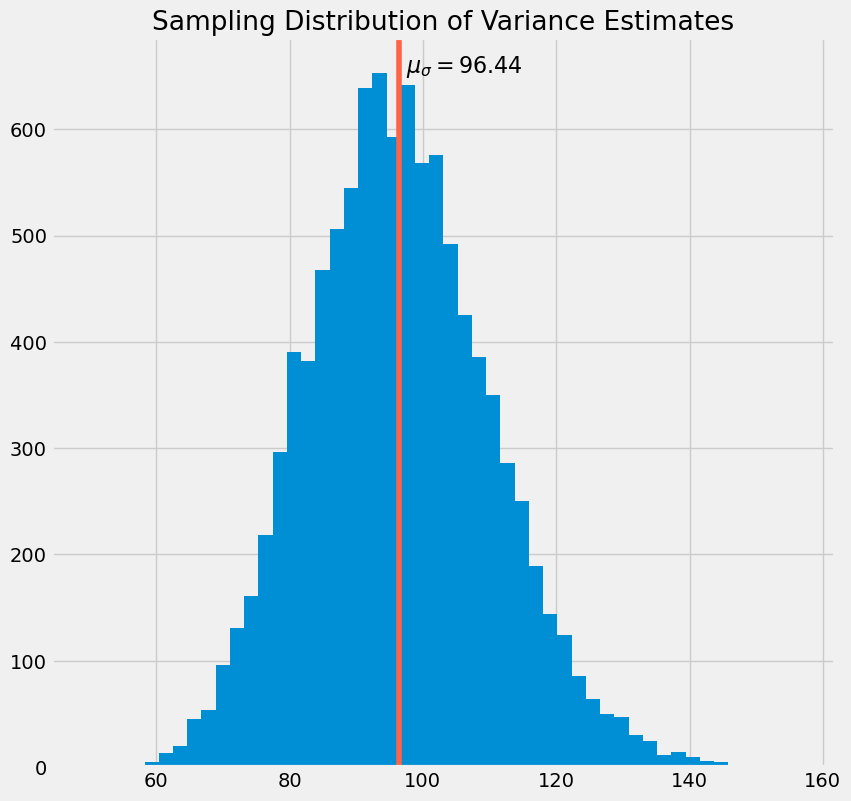

In [14]:
sample_height_array = []
for i in range(10000):
    sample_height = np.random.choice(population_height, size = 100)
    sample_height_array.append(np.var(sample_height, ddof=1))
fig, ax = plt.subplots(figsize=(9, 9))
n, bins, patches = ax.hist(sample_height_array, bins = 50)
ax.axvline(x=np.mean(sample_height_array), color = 'tomato')
ax.text(np.mean(sample_height_array)+1, np.max(n), r'$\mu_\sigma = {:.2f}$'.format(np.mean(sample_height_array)), size = 16)
ax.set_title('Sampling Distribution of Variance Estimates', size = 19)
plt.show()

I guess you have noticed the power of estimators now, if you have many samples, by using an unbiased sample estimator, you will get an accurate estimate of population parameters. Even if you have only one sample, you can still can estimate how possible you would be correct based on sampling distribution.

But we shall keep in mind that **standard deviation** is the most popular measurement of variability. The population/sample standard deviation is simply the square root of variances respectively.

$$
\sigma = \sqrt{\sigma^2}\\
s = \sqrt{s^2}
$$

Similar to variance function in NumPy.

In [15]:
np.std(sample_height_array, ddof=1)

13.641363539211067

## <font face='gotham' color = 'Purple'> Measures of Distribution Shape

**z-score** is defined as below, used for measuring how many standard deviations away from the mean.

\begin{equation}
z_i = \frac{x_i-\bar{x}}{s}
\end{equation}

Note that $z$ has subscript notation $i$ which means each observation has its own $z$-score.

<blockquote>Actually，measuring how many standard deviations away from the mean (or hypothesis) is the fundamental philosophy of frequentist statistics, it asks one important question: <i>how far away from the mean is far-away?</i> If it is far enough, very likely the <i>mean</i> we are looking at right now is not the 'real' mean of the random mechanism that generates the observation.</blockquote>

Here is the example of calculating $z$-score for an randomly generated array. So you can see for a standard normal distribution, it would be fairly hard to stray $2$ standard deviations away.

In [16]:
x = np.random.randn(10)
z = (x - np.mean(x))/np.std(x)
np.round(z, 2)

array([-0.63,  1.39,  0.65, -1.95,  1.09,  0.79, -0.33, -1.22,  0.22,
       -0.02])

## <font face='gotham' color = 'Purple'> Measures of Association Between Two Variables

With similar notation, the **population** and **sample covariance** is defined as:
$$
\sigma_{xy} \frac{\sum(x_i-\mu_x)(y_i-\mu_y)}{N}\\
s_{xy} \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{n-1}
$$


Generate two random arrays, then evaluate a covariance matrix. The values on the diagonal presents the variance, the off-diagonal presents the covariance.

In [17]:
x = np.random.randn(300)
y = np.random.rand(300)
np.cov(x, y)

array([[ 1.04088563, -0.04253353],
       [-0.04253353,  0.0861619 ]])

**Correlation Coefficient** is normalized version of covariance, just like the standard deviation is the normalised variance, some statistics textbook calls it <i>Pearson Product Moment Correlation Coefficient</i>.
​
$$
\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}\\
r_{xy}=\frac{s_{xy}}{s_xs_y}
$$

For the sake of everyone's sanity, not to cluster the lecture notes with repetitive codes, some of them were transported in to ```plot_material.py``` module. Take a look inside if you are curious.

What we did below was basically generating eight linear regression plot $Y = \beta_1+\beta_2X+u$ with different parameters. The correlation coefficient $\rho$ is displayed in the graph, therefore you could observe that the correlation coefficients are affected by size of parameters $\beta_2$ and scale of error term.

The reasons are:
<ol>
    <li>The more significantly $\beta_2$ differs from $0$, the more significant linear relationship the model has, therefore the relatively larger correlation between $X$ and $Y$.</li>
    <li>If the parameters $\beta_1$ and $\beta_2$ kept constant, the larger scale of the error term, the more dispersed the data are, therefore lower correlation as well.</li>
<ol>

In [18]:
def reg_corr_plot():
    class LinearRegression:
        def __init__(self, beta1, beta2, error_scale, data_size):
            self.beta1 = beta1
            self.beta2 = beta2
            self.error_scale = error_scale
            self.x = np.random.randint(1, data_size, data_size)
            self.y = self.beta1 + self.beta2*self.x + self.error_scale*np.random.randn(data_size)

        def x_y_cor(self):
            return np.corrcoef(self.x, self.y)[0, 1]

    fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(24, 12))

    beta1, beta2, error_scale,data_size =  2, .05, 1, 100
    lrg1 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[0, 0].scatter(lrg1.x, lrg1.y)
    ax[0, 0].plot(lrg1.x, beta1 + beta2*lrg1.x, color = '#FA954D', alpha = .7)
    ax[0, 0].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[0, 0].annotate(r'$\rho={:.4}$'.format(lrg1.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, -.6, 1, 100
    lrg2 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[0, 1].scatter(lrg2.x, lrg2.y)
    ax[0, 1].plot(lrg2.x, 2 - .6*lrg2.x, color = '#FA954D', alpha = .7)
    ax[0, 1].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[0, 1].annotate(r'$\rho={:.4}$'.format(lrg2.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, 1, 1, 100
    lrg3 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[0, 2].scatter(lrg3.x, lrg3.y)
    ax[0, 2].plot(lrg3.x, beta1 + beta2 * lrg3.x, color = '#FA954D', alpha = .7)
    ax[0, 2].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[0, 2].annotate(r'$\rho={:.4}$'.format(lrg3.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, 3, 1, 100
    lrg4 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[0, 3].scatter(lrg4.x, lrg4.y)
    ax[0, 3].plot(lrg4.x, beta1 + beta2 * lrg4.x, color = '#FA954D', alpha = .7)
    ax[0, 3].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[0, 3].annotate(r'$\rho={:.4}$'.format(lrg4.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, 3, 3, 100
    lrg5 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[1, 0].scatter(lrg5.x, lrg5.y)
    ax[1, 0].plot(lrg5.x, beta1 + beta2 * lrg5.x, color = '#FA954D', alpha = .7)
    ax[1, 0].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[1, 0].annotate(r'$\rho={:.4}$'.format(lrg5.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, 3, 10, 100
    lrg6 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[1, 1].scatter(lrg6.x, lrg6.y)
    ax[1, 1].plot(lrg6.x, beta1 + beta2 * lrg6.x, color = '#FA954D', alpha = .7)
    ax[1, 1].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[1, 1].annotate(r'$\rho={:.4}$'.format(lrg6.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')

    beta1, beta2, error_scale,data_size =  2, 3, 20, 100
    lrg7 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[1, 2].scatter(lrg7.x, lrg7.y)
    ax[1, 2].plot(lrg7.x, beta1 + beta2 * lrg7.x, color = '#FA954D', alpha = .7)
    ax[1, 2].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[1, 2].annotate(r'$\rho={:.4}$'.format(lrg7.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')


    beta1, beta2, error_scale,data_size =  2, 3, 50, 100
    lrg8 = LinearRegression(beta1, beta2, error_scale, data_size)
    ax[1, 3].scatter(lrg8.x, lrg8.y)
    ax[1, 3].plot(lrg3.x, beta1 + beta2 * lrg3.x, color = '#FA954D', alpha = .7)
    ax[1, 3].set_title(r'$Y={}+{}X+{}u$'.format(beta1, beta2, error_scale))
    ax[1, 3].annotate(r'$\rho={:.4}$'.format(lrg8.x_y_cor()), xy=(0.1, 0.9), xycoords='axes fraction')


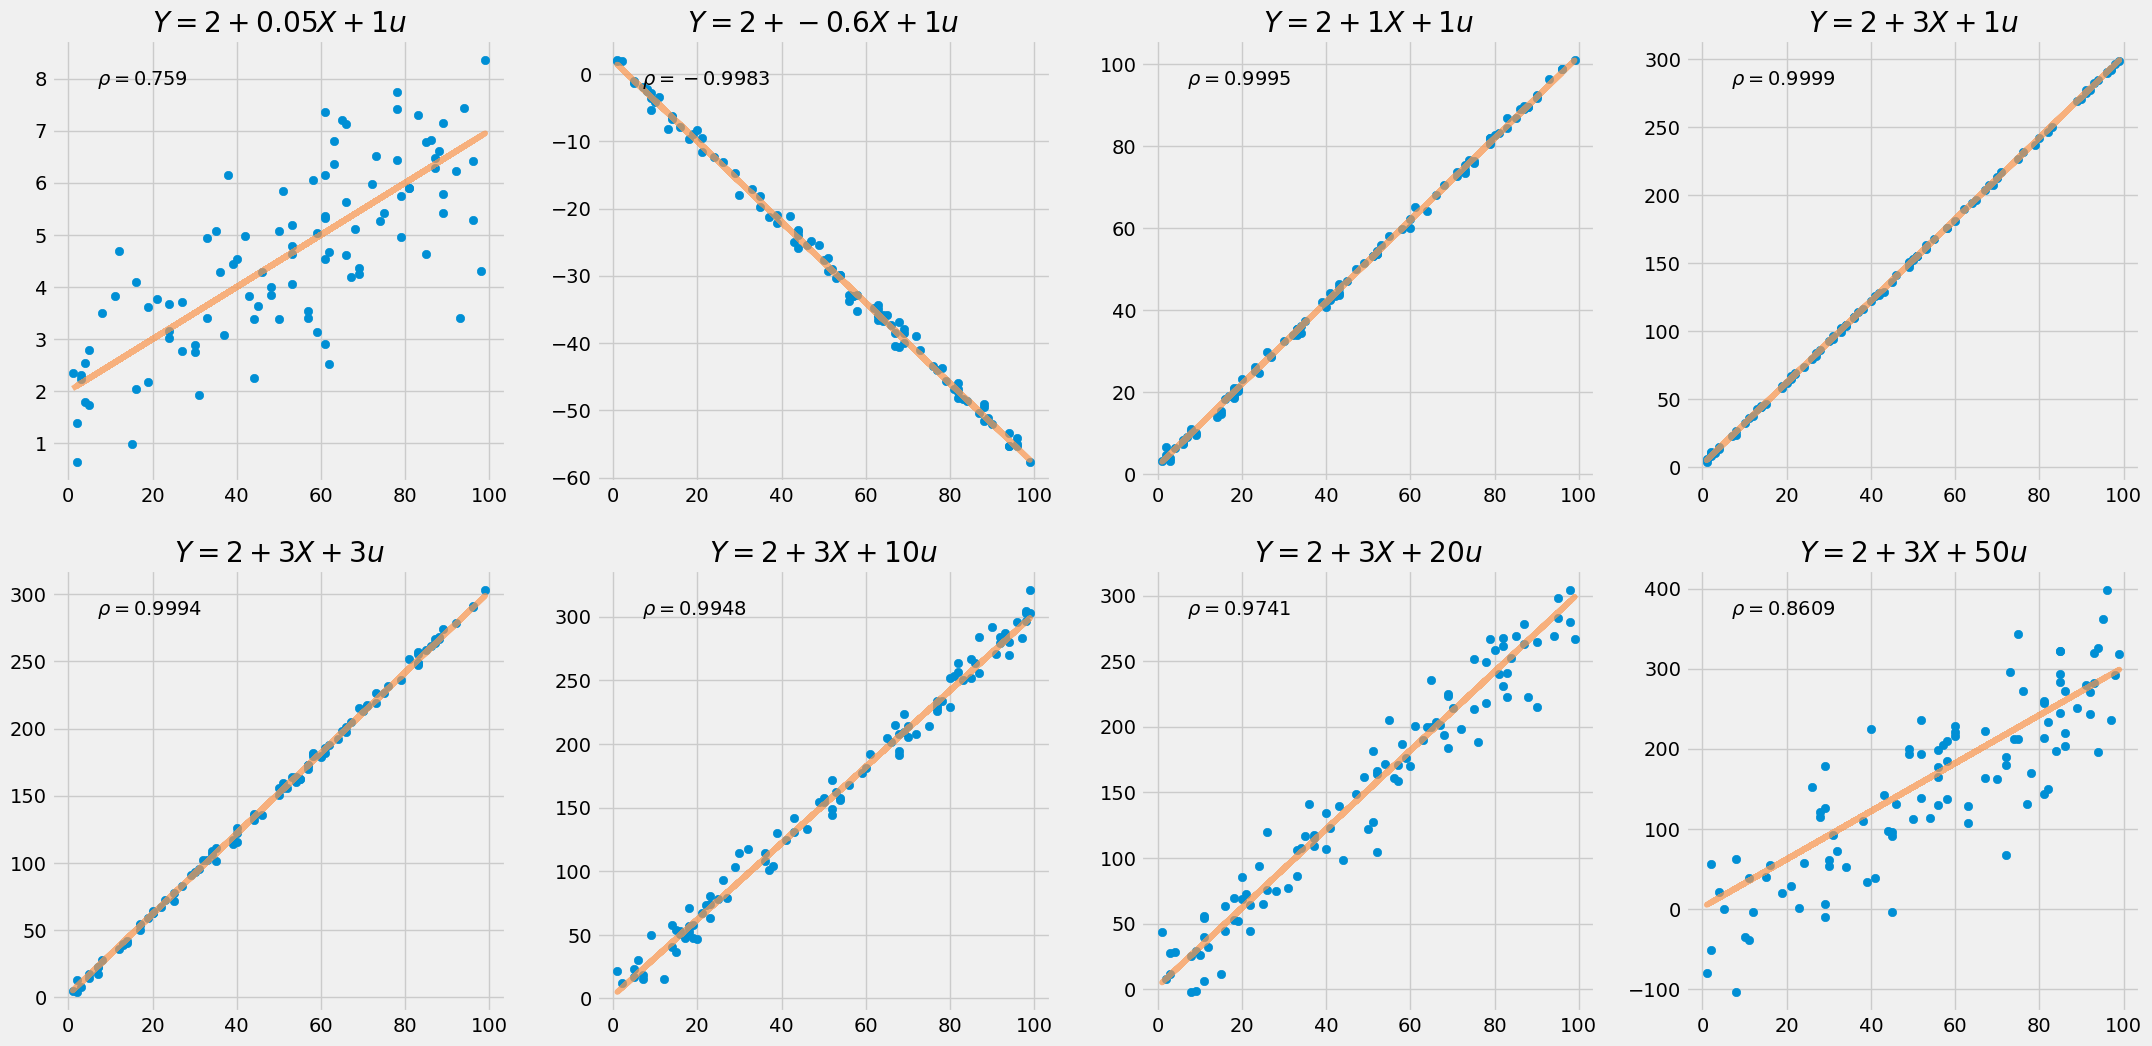

In [19]:
reg_corr_plot()

### <font face='gotham' color='maroon'>Different Types of Correlation Coefficient

The correlation coefficient above is the **Pearson correlation**, which assumes a linear relationship between two variables. However, there are other correlation coefficients which also measures nonlinear correlation, such as **Spearman correlation** and **Kendall's $\tau$**.

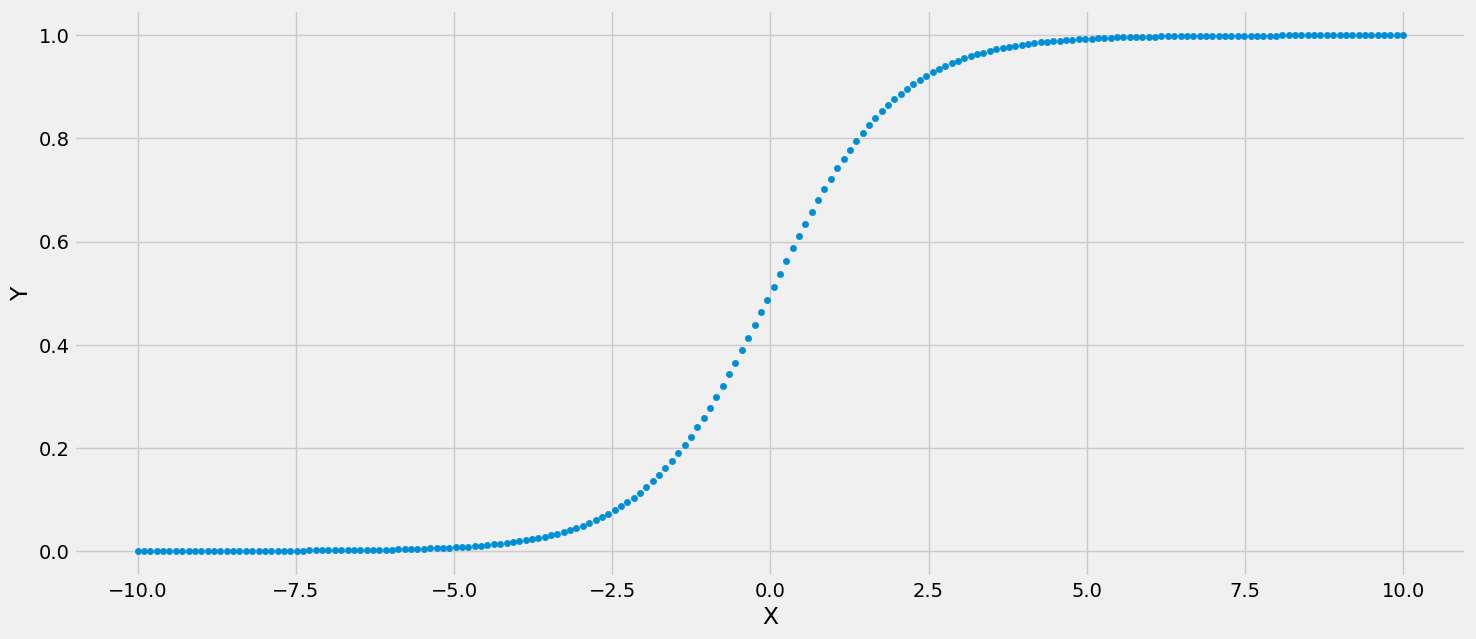

In [20]:
X = np.linspace(-10, 10, 200)
Y = 1/(1+np.exp(-X))
df_dict = {'X': X, 'Y': Y}
df = pd.DataFrame(df_dict)

df.plot(x ='X', y ='Y', kind='scatter', figsize=(16, 7)); plt.show()

In [21]:
df.corr(method='pearson')

,X,Y
X,1.000000,0.936137
Y,0.936137,1.000000


In [22]:
print('Pearson coeffcient: {}'.format(sp.stats.stats.pearsonr(df['X'], df['Y'])[0]))

Pearson coeffcient: 0.9361365508325603


C:\Users\user\AppData\Local\Temp\ipykernel_5096\2606466868.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print('Pearson coeffcient: {}'.format(sp.stats.stats.pearsonr(df['X'], df['Y'])[0]))


In [23]:
print('Pearson coeffcient: {}'.format(sp.stats.stats.spearmanr(df['X'], df['Y'])[0]))

Pearson coeffcient: 1.0


C:\Users\user\AppData\Local\Temp\ipykernel_5096\1427796510.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print('Pearson coeffcient: {}'.format(sp.stats.stats.spearmanr(df['X'], df['Y'])[0]))


In [24]:
sp.stats.stats.kendalltau(X, Y)
print('Pearson coeffcient: {}'.format(sp.stats.stats.kendalltau(df['X'], df['Y'])[0]))

Pearson coeffcient: 1.0


C:\Users\user\AppData\Local\Temp\ipykernel_5096\2297362245.py:1: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  sp.stats.stats.kendalltau(X, Y)
C:\Users\user\AppData\Local\Temp\ipykernel_5096\2297362245.py:2: DeprecationWarning: Please use `kendalltau` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  print('Pearson coeffcient: {}'.format(sp.stats.stats.kendalltau(df['X'], df['Y'])[0]))


Notice the difference, that Pearson and Kendall produce a perfect correlation coefficient, it is because the latter two are rank tests.